# Curve fitting for the electrical consumption of different components

- Feedwater pump
- Cooling pump
- Brine pump
- Distillate pump
- Heat source pump

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd

from solarmed_modeling.curve_fitting import ensure_monotony, fit_data
from solarmed_modeling.curve_fitting.calibration import fit_curve 

save_result: bool = False
data_path = Path('/workspaces/SolarMED/modeling/data/datasets')
result_path: Path = Path('/workspaces/SolarMED/modeling/data/curve_fits.json')


### MED Feedwater pump consumption ($J_{med,f}$)

In [3]:
fit_name = 'feedwater_electrical_consumption'
include_spline = False
df = pd.read_csv(data_path / "med_cooling_and_feedwater_pumps_consumption.csv")
xrange = np.arange(552, 795)
unit='W'

x_data = df['FT-DES-003'][xrange]    # (m³/h)
y_data = df['PK-MED-E02-pa'][xrange] # (W)


Converted ydata to kW from W (·1e⁻³)
Failed attemp to fit using exponential_curve, skipping
Best-fit parameters:
Parameter 1: 0.019077706335712326
Parameter 2: -0.09466303549610014
Parameter 3: 0.7035299527191431


/workspaces/solarmed/miniconda3/envs/conda-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



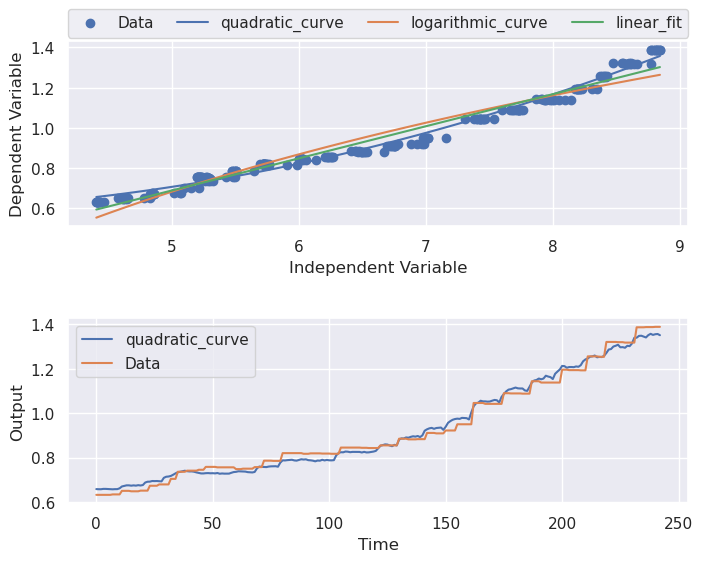

In [5]:
fit = fit_curve(x_data, y_data, fit_name, unit=unit, include_spline = include_spline,
                visualize_result=True, save_result=save_result, result_path=result_path)


In [8]:
if df['PK-MED-E02-pa'].max() > 1e3: 
    df['PK-MED-E02-pa'] = df['PK-MED-E02-pa'] * 1e-3  # W to kW
fit, fig = fit_data(df=df.iloc[xrange], x_var='FT-DES-003', y_var='PK-MED-E02-pa', x_var_unit='m³/h', y_var_unit='kW', degree=2)
fig.show()


[PK-MED-E02-pa=f(FT-DES-003)] Coefficients to copy: [ 0.70352994 -0.09466303  0.01907771]


### MED Cooling pump consumption ($J_{med,c}$)

In [24]:
fit_name = 'cooling_electrical_consumption'
include_spline = False
df = pd.read_csv(data_path / "med_cooling_and_feedwater_pumps_consumption.csv")
xrange = np.arange(151, 389)
unit='W'

x_data = df['FT-DES-002_VFD'][xrange] # (m³/h)
y_data = df['PK-MED-E03-pa'][xrange]  # (W)


Converted ydata to kW from W (·1e⁻³)
Best-fit parameters:
Parameter 1: 0.056680794931454774
Parameter 2: -0.9238542100009888
Parameter 3: 5.2178993694785625


/workspaces/SolarMED/modeling/src/solarmed_modeling/curve_fitting/calibration.py:79: OptimizeWarning:

Covariance of the parameters could not be estimated

/workspaces/solarmed/miniconda3/envs/conda-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



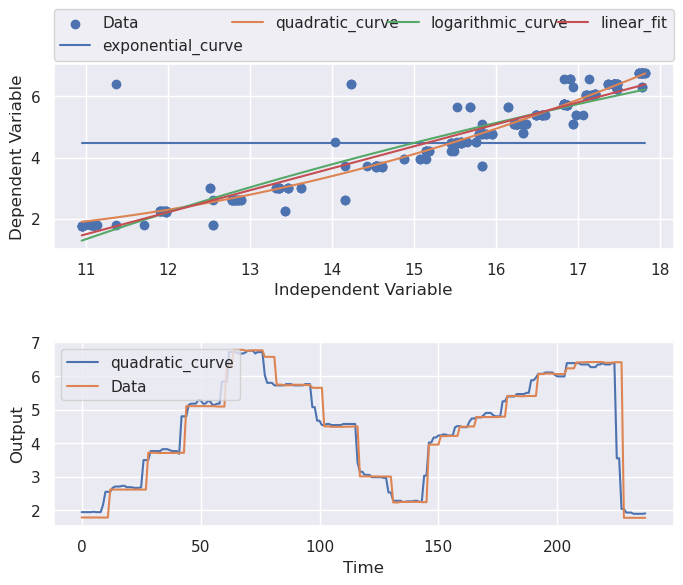

In [25]:
fit = fit_curve(x_data, y_data, fit_name, unit=unit, include_spline = include_spline,
                visualize_result=True, save_result=save_result, result_path=result_path)


In [32]:
if df['PK-MED-E03-pa'].max() > 1e3: 
    df['PK-MED-E03-pa'] = df['PK-MED-E03-pa'] * 1e-3  # W to kW
fit, fig = fit_data(df=df.iloc[xrange], x_var='FT-DES-002_VFD', y_var='PK-MED-E03-pa', x_var_unit='m³/h', y_var_unit='kW', degree=2)
fig.show()


[PK-MED-E03-pa=f(FT-DES-002_VFD)] Coefficients to copy: [ 5.21789826 -0.92385405  0.05668079]


### MED brine pump consumption ($J_{med,b}$)

No flow measurements available, done manually

Test date: **20220908**

Failed attemp to fit using exponential_curve, skipping
Best-fit parameters:
Parameter 1: [0.09 0.09 0.09 0.09 7.11 8.42 9.76 9.76 9.76 9.76]
Parameter 2: [-0.    0.32  0.29  0.36  0.47  1.02  0.    0.    0.    0.  ]
Parameter 3: 3


/workspaces/SolarMED/modeling/src/solarmed_modeling/curve_fitting/curves.py:50: RuntimeWarning:

invalid value encountered in log



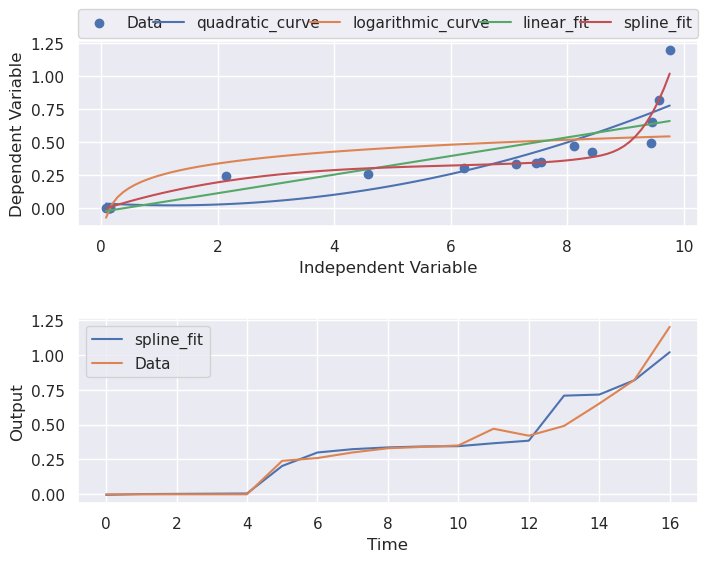

In [23]:
fit_name = 'brine_electrical_consumption'
include_spline = True
unit = 'kW'

# df = pd.read_csv(data_path)
# xrange = np.arange(151, 389)

# Power consumption from VFD (kWh)
y_data = np.array([0, 0, 0, 0, 0, 0.24, 0.26, 0.3, 0.33, 0.34, 0.35, 0.47, 0.42, 0.49, 0.65, 0.82, 1.2]) # kW
# Flow rate (m³/h?)
x_data = np.array([0.086, 0.126, 0.115, 0.12, 0.113, 2.146, 4.577, 6.22, 7.112, 7.465, 7.551, 8.122, 8.422, 9.442, 9.247, 9.572, 9.757]) # m³/h
x_data = ensure_monotony(x_data)

fit = fit_curve(x_data, y_data, fit_name, unit=unit, include_spline = include_spline,
                visualize_result=True, save_result=save_result, result_path=result_path)


### MED distillate pump consumption ($J_{med,d}$)

Operation diary: 2024-07-19 (Fri 19 Jul)

In [33]:
fit_name = 'distillate_electrical_consumption'
include_spline = False
df = pd.read_csv(data_path / "med_distillate_pump_consumption.csv")
xrange = np.arange(1000, len(df)) # np.arange(8000, len(df)-1500)
unit='kW'


Failed attemp to fit using exponential_curve, skipping
Best-fit parameters:
Parameter 1: 0.9484207971761789
Parameter 2: -3.6572156762250954
Parameter 3: 4.149635559273511


/workspaces/solarmed/miniconda3/envs/conda-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



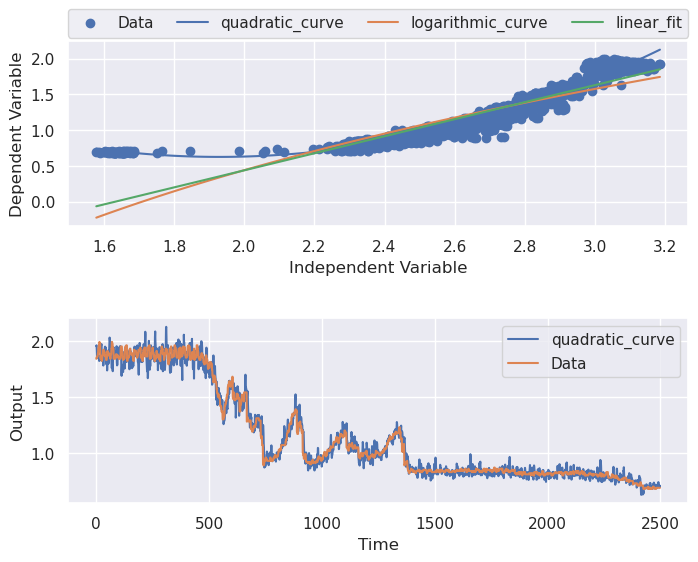

In [11]:
x_data = df['Mprod']
y_data = df['Eprod']

fit = fit_curve(x_data, y_data, fit_name, unit=unit, include_spline = include_spline,
                visualize_result=True, save_result=save_result, result_path=result_path)


<Axes: >

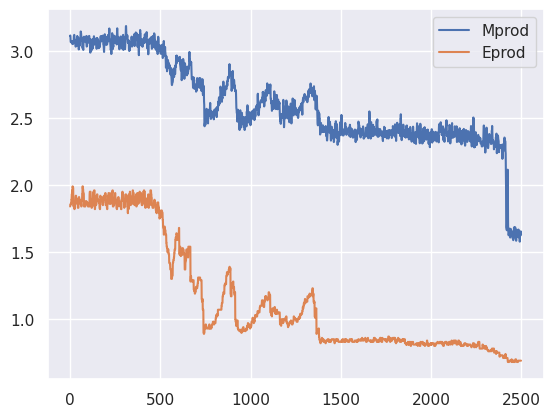

In [38]:
df[['Mprod', 'Eprod']].plot()


In [22]:
xrange = np.arange(1400, len(df)) # np.arange(8000, len(df)-1500)

fit, fig = fit_data(df=df.iloc[xrange], x_var='Mprod', y_var='Eprod', x_var_unit='m³/h', y_var_unit='kW', degree=2)
fig.show()


[Eprod=f(Mprod)] Coefficients to copy: [ 1.43398622 -0.89165022  0.2661572 ]


### MED heat source pump consumption ($J_{med,s}$)

In [ ]:
fit_name = 'hotwater_electrical_consumption'
include_spline = False
df = pd.read_csv(data_path / "med_heat_source_pump_consumption.csv")
xrange = np.arange(241, 550)
unit='kW'

x_data = df['FT-AQU-100'][xrange]*3.6 # (m³/h)
y_data = df['IT-DES-001'][xrange]-(df['IT-DES-001'].iloc[241:243]).mean()  # (kW)

fit = fit_curve(x_data, y_data, fit_name, unit=unit, include_spline = include_spline,
                visualize_result=True, save_result=save_result, result_path=result_path)


### Solar field recirculation pump consumption ($C_{sf}$)

Available at [gitlab.psa.es/jmserrano/aquasol-librescada](http://gitlab.psa.es/jmserrano/aquasol-librescada/-/tree/main/python)

### Thermal storage recirculation pump consumption ($C_{ts,src}$)

Available at [gitlab.psa.es/jmserrano/aquasol-librescada](http://gitlab.psa.es/jmserrano/aquasol-librescada/-/tree/main/python)